In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
# Import Dataset
path = r'C:\Users\Zarqa Ayub\Achievement 6'
df=pd.read_csv(os.path.join(path,'02. Data', 'Prepared Data', 'df_cluster.csv'),index_col=0)
df.head()

,Code,Year,Meningitis,Alzheimer's Dis. & Oth.,Parkinson's Dis.,Nutr. Def.,Malaria,Drown.,Interp. Viol.,Mat. Dis.,...,Sudden Ext. Cause,Sudden Ext. Cause Norm.,Sudden Int. Cause,Sudden Int. Cause Norm.,GDP Corr.Dis.,GDP Corr.Dis.Norm.,Infect. Dis.,Mat.Chl.,Age Related Dis.,Segment
0,AFG,2010,2410,1476,465,1974,377,1837,4130,4940,...,15514,53.156520,84822,290.630552,23633,80.975122,64395,28761,90972,first
1,AFG,2011,2327,1508,473,1846,390,1775,4170,4857,...,15299,50.797856,85708,284.579555,24152,80.192811,62627,28808,91991,first
2,AFG,2012,2254,1544,482,1705,94,1716,4245,4736,...,15646,50.209593,86785,278.501822,24699,79.261583,61231,28793,93175,first
3,AFG,2013,2281,1581,491,1690,143,1777,4379,4623,...,16258,50.381801,87882,272.336905,25348,78.550737,61312,28857,94405,first
4,AFG,2014,1935,1620,502,1617,228,1757,4420,4470,...,16746,50.181605,89181,267.242667,25965,77.807558,60528,28633,95862,first


In [4]:
# Create column including treatable causes for death
df_treat=['Meningitis','Alzheimer\'s Dis. & Oth.','Parkinson\'s Dis.',
           'Nutr. Def.','Tuberculosis','Cardiovascular Dis.','Low. Resp. Inf.',
           'Neonatal Dis.','Diabetes Mellitus', 'Chr. Kidney Dis.',
           'Poisonings','Road Inj.', 'Chr. Resp. Dis.',
           'Cirr. and Chr. Liver Dis.','Digestive Dis.']
df['Treatable Dis.']=df[df_treat].sum(axis=1)

In [6]:
# Drop categorical values 
df_num=df.drop(columns={'Code','Top Cause',
       'Underlying Factor', 'Continent'})
df.head()

,Code,Year,Meningitis,Alzheimer's Dis. & Oth.,Parkinson's Dis.,Nutr. Def.,Malaria,Drown.,Interp. Viol.,Mat. Dis.,...,Sudden Ext. Cause Norm.,Sudden Int. Cause,Sudden Int. Cause Norm.,GDP Corr.Dis.,GDP Corr.Dis.Norm.,Infect. Dis.,Mat.Chl.,Age Related Dis.,Segment,Treatable Dis.
0,AFG,2010,2410,1476,465,1974,377,1837,4130,4940,...,53.156520,84822,290.630552,23633,80.975122,64395,28761,90972,first,144806
1,AFG,2011,2327,1508,473,1846,390,1775,4170,4857,...,50.797856,85708,284.579555,24152,80.192811,62627,28808,91991,first,144448
2,AFG,2012,2254,1544,482,1705,94,1716,4245,4736,...,50.209593,86785,278.501822,24699,79.261583,61231,28793,93175,first,144327
3,AFG,2013,2281,1581,491,1690,143,1777,4379,4623,...,50.381801,87882,272.336905,25348,78.550737,61312,28857,94405,first,145926
4,AFG,2014,1935,1620,502,1617,228,1757,4420,4470,...,50.181605,89181,267.242667,25965,77.807558,60528,28633,95862,first,145940


In [7]:
# Columns to group by
group_columns = ['Year']

# Exclude 'country' from grouping and sum the values in each group
grouped_df = df_num.groupby(group_columns, as_index=True).sum()

In [8]:
grouped_df

,Meningitis,Alzheimer's Dis. & Oth.,Parkinson's Dis.,Nutr. Def.,Malaria,Drown.,Interp. Viol.,Mat. Dis.,HIV/AIDS,Drug Use Dis.,...,Sudden Ext. Cause Norm.,Sudden Int. Cause,Sudden Int. Cause Norm.,GDP Corr.Dis.,GDP Corr.Dis.Norm.,Infect. Dis.,Mat.Chl.,Age Related Dis.,Segment,Treatable Dis.
Year,,,,,,,,,,,,,,,,,,,,,
2010,321528,1145243,273244,302755,908817,287393,413412,236734,1360005,87397,...,10629.241793,29929515,88887.333249,10834414,33767.293841,11384867,2641432,32355873,firstfirstfirstfirstfirstfirstfirstfirstfirstf...,34619025
2011,307436,1189865,281385,295088,867450,277798,410345,231648,1279106,88600,...,8265.970461,30326669,89053.013588,11059540,34187.743906,10909495,2591057,32842490,firstfirstfirstfirstfirstfirstfirstfirstfirstf...,34855453
2012,293910,1235530,289870,287703,804178,272103,413357,223249,1192166,90180,...,8119.988881,30721565,88859.153135,11286180,34480.035922,10572897,2535707,33325393,firstfirstfirstfirstfirstfirstfirstfirstfirstf...,35102597
2013,283522,1282181,300152,281314,748709,263442,411519,219530,1119912,93786,...,8006.394299,31203625,89102.964468,11528324,34887.651410,10363645,2491761,33902936,firstfirstfirstfirstfirstfirstfirstfirstfirstf...,35474837
2014,274478,1330596,309440,274719,720304,255272,409189,210914,1066803,98473,...,7869.539702,31669930,89067.259466,11783330,35015.941410,10110579,2421510,34461189,firstfirstfirstfirstfirstfirstfirstfirstfirstf...,35772506
2015,261753,1375963,317362,268786,698470,250525,398815,203692,1021470,104443,...,7807.253845,32263782,89922.559199,12057280,35444.654775,9900776,2355681,35140449,firstfirstfirstfirstfirstfirstfirstfirstfirstf...,36172027
2016,252906,1431488,326027,260447,650764,244838,394726,198439,983027,111867,...,7470.302345,32860692,90350.846931,12359879,35788.474410,9607731,2258026,35838794,firstfirstfirstfirstfirstfirstfirstfirstfirstf...,36537809
2017,242019,1488384,334478,255369,620223,237998,400051,193928,934429,117276,...,7589.583808,33443773,91182.166366,12645580,36200.902017,9387763,2170265,36514185,firstfirstfirstfirstfirstfirstfirstfirstfirstf...,36909953
2018,233019,1533060,343526,245853,622126,235551,399952,192512,879179,119103,...,7225.996637,34006140,91153.330938,12918054,36253.059299,9139480,2088037,37155018,firstfirstfirstfirstfirstfirstfirstfirstfirstf...,37227817


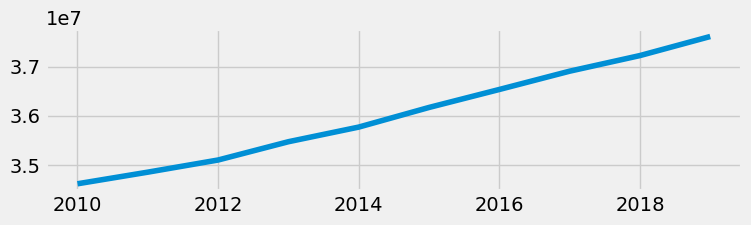

In [9]:
sub_treat=grouped_df[['Treatable Dis.']]
plt.figure(figsize=(8,2), dpi=100)
plt.plot(sub_treat)

### Decomposition

In [10]:
sub_treat

,Treatable Dis.
Year,
2010,34619025
2011,34855453
2012,35102597
2013,35474837
2014,35772506
2015,36172027
2016,36537809
2017,36909953
2018,37227817


In [11]:
sub_treat = sub_treat.reset_index()

In [12]:
# Create a new column combining the year with a specific month (e.g., January)
sub_treat['datetime'] = pd.to_datetime(sub_treat['Year'].astype(str) + '-01-01')

# Set the new column as the index
sub_treat.set_index('datetime', inplace=True)

# Drop the original 'Year' column if needed
sub_treat.drop(columns=['Year'], inplace=True)

In [13]:
sub_treat

,Treatable Dis.
datetime,
2010-01-01,34619025
2011-01-01,34855453
2012-01-01,35102597
2013-01-01,35474837
2014-01-01,35772506
2015-01-01,36172027
2016-01-01,36537809
2017-01-01,36909953
2018-01-01,37227817


In [14]:
decomposition = sm.tsa.seasonal_decompose(sub_treat, model='additive')

In [15]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

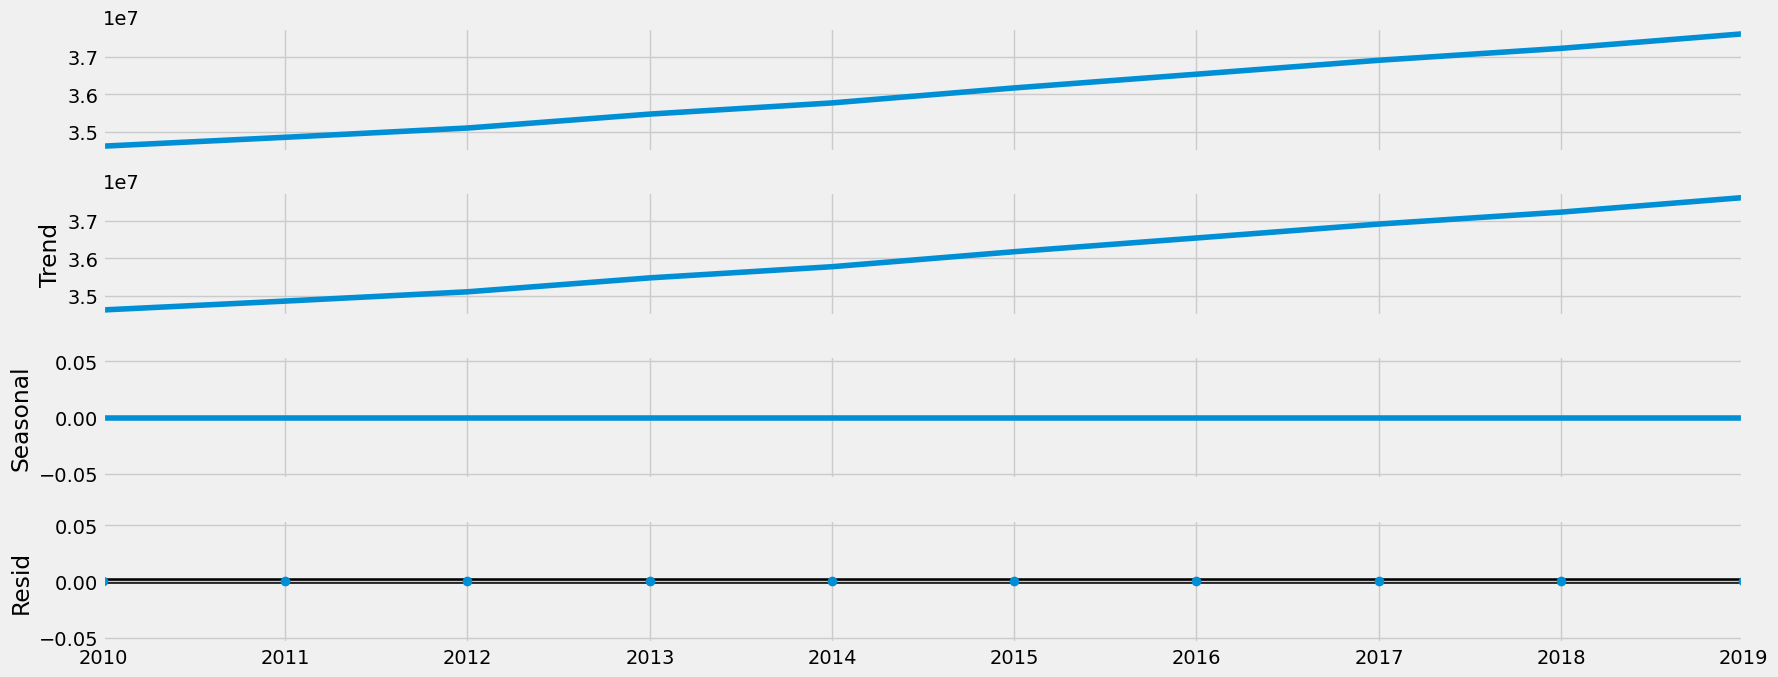

<Figure size 1800x700 with 0 Axes>

In [16]:
# Plot the separate components

decomposition.plot()
plt.show()
plt.savefig("C:/Users/Zarqa Ayub/Achievement 6/04. Visualisations/Seasonality.png")

There is no seasonality in the time period observed.There is only upward trend which is pointing to non stationarity.

### Checking for Stationarity

In [17]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller

# Define the function
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub_treat['Treatable Dis.'])

Dickey-Fuller Stationarity test:
Test Statistic                 1.163971
p-value                        0.995727
Number of Lags Used            1.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


As the T value is 1.16 which is smaller than the 5% hence it is proved the data is non stationary.

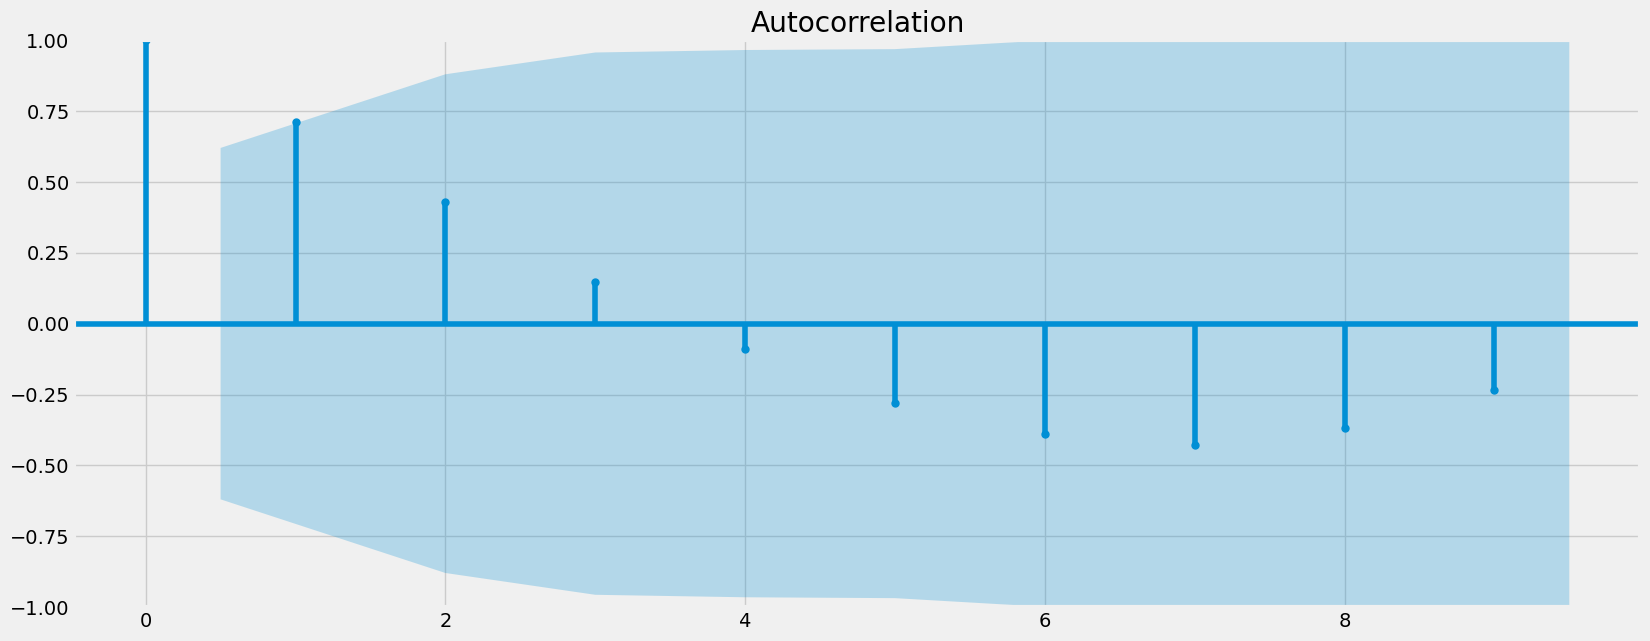

<Figure size 1800x700 with 0 Axes>

In [19]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sub_treat)
plt.show()
plt.savefig("C:/Users/Zarqa Ayub/Achievement 6/04. Visualisations/Autocorrelation.png")

### Transforming the data  into stationary

In [20]:
sub_treat

,Treatable Dis.
datetime,
2010-01-01,34619025
2011-01-01,34855453
2012-01-01,35102597
2013-01-01,35474837
2014-01-01,35772506
2015-01-01,36172027
2016-01-01,36537809
2017-01-01,36909953
2018-01-01,37227817


In [21]:
sub_diff = sub_treat - sub_treat.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing

In [22]:
# Remove NaN
sub_diff.dropna(inplace = True)

In [23]:
sub_diff

,Treatable Dis.
datetime,
2011-01-01,236428.0
2012-01-01,247144.0
2013-01-01,372240.0
2014-01-01,297669.0
2015-01-01,399521.0
2016-01-01,365782.0
2017-01-01,372144.0
2018-01-01,317864.0
2019-01-01,388013.0


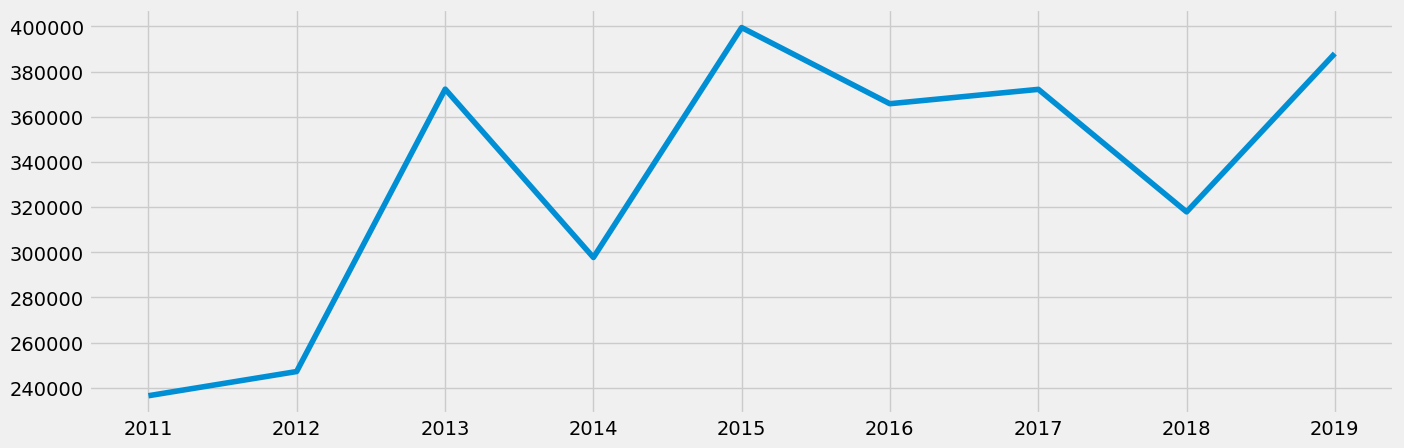

In [34]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub_diff)
plt.savefig("C:/Users/Zarqa Ayub/Achievement 6/04. Visualisations/Time sseries curve.png")


In [27]:
dickey_fuller(sub_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -2.478663
p-value                        0.120753
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


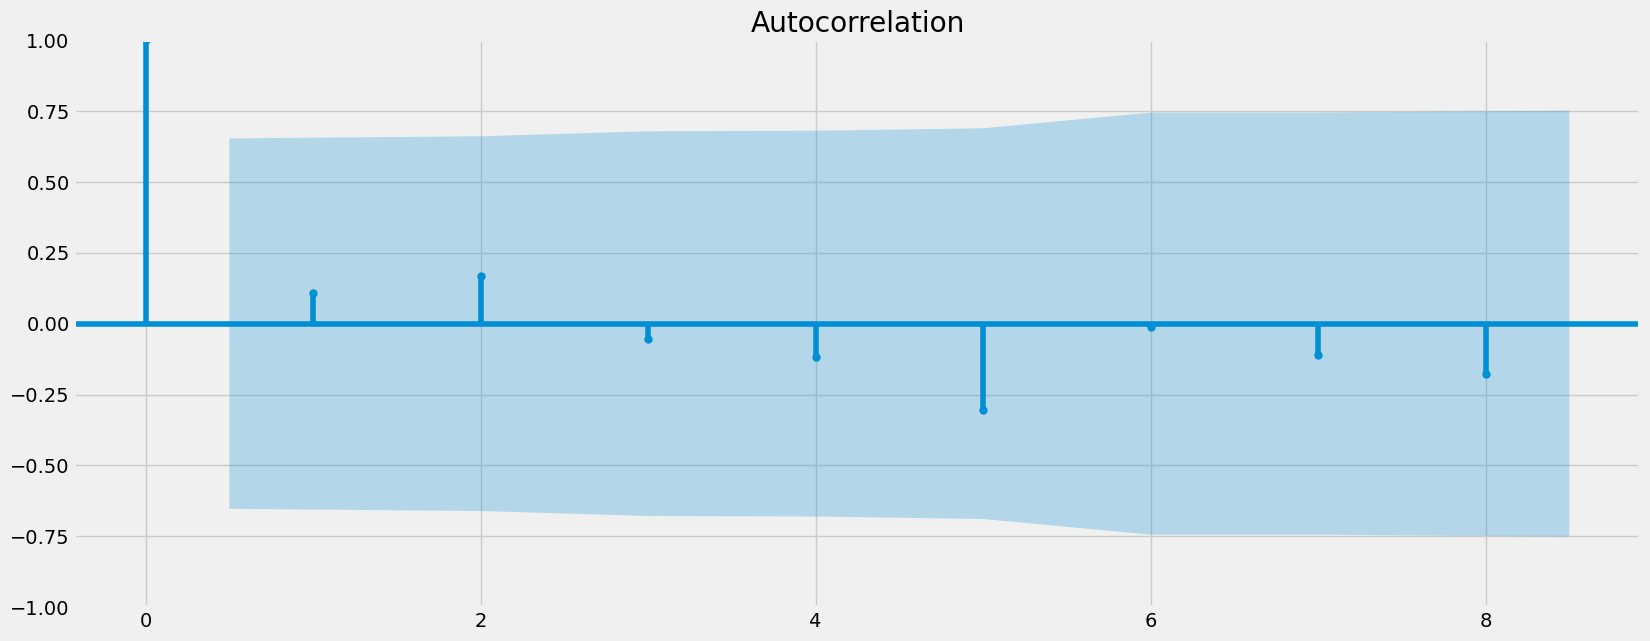

In [28]:
plot_acf(sub_diff)
plt.show()

Even though the test statistic values is smaller than the critical value 5%, a relatively high p-values and a critical value of 10% higher than the test statistics, indicates to a weak stationarity. Below the differencing will be run again.

In [29]:
sub_diff2 = sub_diff - sub_diff.shift(1)

In [30]:
sub_diff2.dropna(inplace = True)

In [31]:
sub_diff2

,Treatable Dis.
datetime,
2012-01-01,10716.0
2013-01-01,125096.0
2014-01-01,-74571.0
2015-01-01,101852.0
2016-01-01,-33739.0
2017-01-01,6362.0
2018-01-01,-54280.0
2019-01-01,70149.0


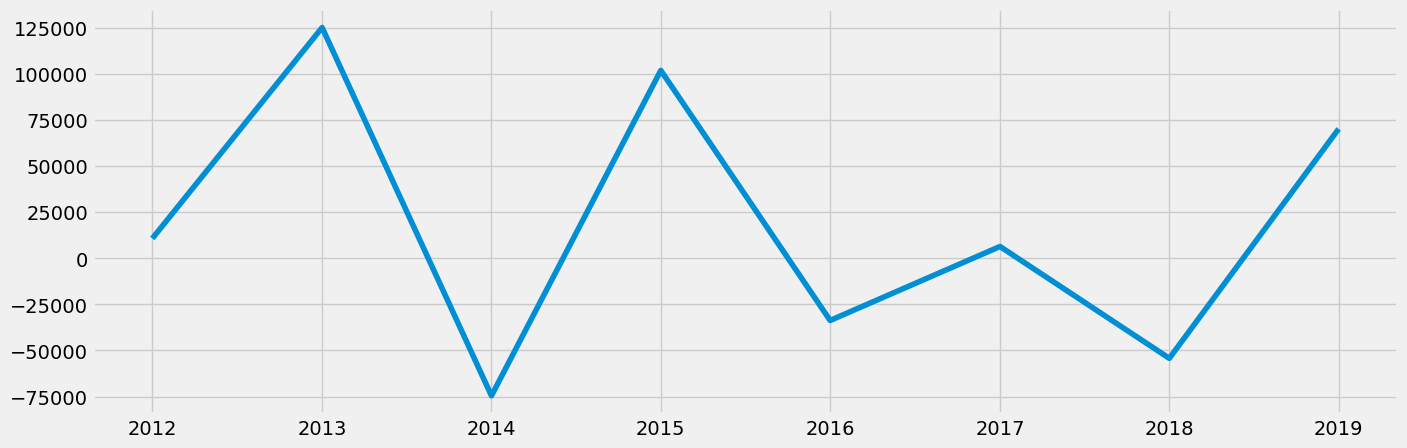

In [35]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub_diff2)
plt.savefig("C:/Users/Zarqa Ayub/Achievement 6/04. Visualisations/Time series curve aft Autocorrelaion.png")

In [33]:
dickey_fuller(sub_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -5.092458
p-value                        0.000015
Number of Lags Used            0.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


The test statistic value is smaller even than critical value 1%. As a result, the trend has been eliminated, and the mean and variance have become constant, transforming the data into a stationary time series.

In [36]:
df.head()

,Code,Year,Meningitis,Alzheimer's Dis. & Oth.,Parkinson's Dis.,Nutr. Def.,Malaria,Drown.,Interp. Viol.,Mat. Dis.,...,Sudden Ext. Cause Norm.,Sudden Int. Cause,Sudden Int. Cause Norm.,GDP Corr.Dis.,GDP Corr.Dis.Norm.,Infect. Dis.,Mat.Chl.,Age Related Dis.,Segment,Treatable Dis.
0,AFG,2010,2410,1476,465,1974,377,1837,4130,4940,...,53.156520,84822,290.630552,23633,80.975122,64395,28761,90972,first,144806
1,AFG,2011,2327,1508,473,1846,390,1775,4170,4857,...,50.797856,85708,284.579555,24152,80.192811,62627,28808,91991,first,144448
2,AFG,2012,2254,1544,482,1705,94,1716,4245,4736,...,50.209593,86785,278.501822,24699,79.261583,61231,28793,93175,first,144327
3,AFG,2013,2281,1581,491,1690,143,1777,4379,4623,...,50.381801,87882,272.336905,25348,78.550737,61312,28857,94405,first,145926
4,AFG,2014,1935,1620,502,1617,228,1757,4420,4470,...,50.181605,89181,267.242667,25965,77.807558,60528,28633,95862,first,145940


In [37]:
# Export prepared data
df.to_csv(os.path.join(path,'02. data','Prepared data','df_final prepared data.csv'))